# Assignment Collective Intelligence Week 7: Information retrieval

## Notebook made by   (If not filled in correctly: 0 pts for assignment)

__Name(s)__: Robin Spiers & Tom Handgraaf

__Student id(s)__ : 11829494 & 11852615

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )

Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file.

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='https://i.imgur.com/RZVQP9i.jpg'/>

In [3]:
from collections import Counter,defaultdict
from bs4 import BeautifulSoup
import os
import glob
import nltk
import math
from __future__ import division
import requests
from collections import Counter
import re

**Q1** Make a couple of functions which do the following:

1. Download all these files: <http://www.ibiblio.org/xml/examples/shakespeare/>, and store them locally in a folder.
2. Make a function `index_collection(folder)` which reads in each file `f` in that folder, and returns a dict with words as keys and as values a dict with filenames as keys and how often the word occurs in the filename as values. So:
    1. Extract the text
    3. tokenize and lower case that text
    2. for each token `w`: how often `w` occurs in `f`



In [4]:
def index_collection(folder):
 
    # initialize MyIndex
    MyIndex = defaultdict(lambda:{})
    
    files = [file for file in glob.glob(os.path.join(folder, '*.xml'))]
    
    # loop over each file
    for file in files:
        
        # open file
        with open(file) as f:
        
            # extract text using BeautifulSoup
            tomatensoep = BeautifulSoup(f, "lxml")
            text = ' '.join(t.text for t in tomatensoep.findAll('line'))
        
            # tokenize & lower case
            tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
            tokens = tokenizer.tokenize(text.lower())
        
            # update MyIndex with each token
            counted = Counter(tokens)
            for x in tokens:
                MyIndex[x][file[12:]] = counted[x]
    
    # for each token w, w: how many times w appears in f
    MyIndex = {w : (len(MyIndex[w]), MyIndex[w]) for w in MyIndex}
    return MyIndex

In [5]:
path_to_folder = "shakespeare"

# try it out 
shakespeare = index_collection(path_to_folder)

# Now I can call 
shakespeare['love']
# and obtain a dict of filename:count pairs

KeyError: 'love'

In [ ]:
{
    'love': {
        'macbeth': 30,
        
    }
}

**Q2**  Change your function `index_collection(folder)` so that it also stores the document frequency of each word: as follows

```
shakespeare['macbeth'] = (document_frequency of 'macbeth', dict of filename:count pairs)
```

In [ ]:
shakespeare=index_collection_plusDF(path_to_my_folder)

In [ ]:
shakespeare['love']

**Q3** Create a function `query(index,string)` which does information retrieval on a created index.

1. It first tokenizes string into a list `L` of keywords .
2. Then it computes `sum(score(w,doc) for w in L)` for each document `doc` in our collection.
3. `score(w,doc)` is simply `(TF(w,doc) * IDF(w)) `, where `TF(w,doc)` is the raw frequency of `w` in `doc` and `IDF(w)` is the inverse document frequency as defined in [G. Adomavicius and A. Tuzhilin. "Towards the Next Generation of Recommender Systems: A Survey of the State-of-the-Art and Possible Extensions." IEEE Transactions on Knowledge and Data Engineering, vol. 17, no. 6, June 2005. ](http://web.stanford.edu/class/ee378b/papers/adomavicius-recsys.pdf) 
4. The output is a list of `(score,filename)` pairs sorted on `score`. 

In [ ]:
def score(w,doc,index,N):
    TF = doc[w] / len(doc)
    IDF = np.log10(N / index[w][0])
    return TF * IDF
      
def query(index,string):
    # set the list of docs and the number of docs
    Docs = [f for f in glob.glob(os.path.join(path_to_folder, '*.xml'))]
    Number_of_docs = max([index[i][0] for i in index])
    
    # step 1 tokenize string
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string.lower())

    # compute score for each doc
    scores = []
    for doc in Docs:
        with open(doc) as f:
            # applying tokenizer and counter
            groentesoep = BeautifulSoup(f, "lxml")
            text = ' '.join(x.text for x in groentesoep.findAll('line'))
            text = tokenizer.tokenize(text.lower())
            text = Counter(text)
            
            # compute score
            temp = 0
            for w in tokens:
                temp += score(w, text, index, Number_of_docs)
            scores.append((temp, doc[12:]))
    # sort
    return sorted(scores, key = lambda x: x[0])
    
# test
query(shakespeare,'caesar caesar')

**Q4** Argue that you have just implemented the dot-product of the query-vector and the document-vector. 

* Experiment with adding the same term multiple times to the query. What happens? Does that make sense?

#### Antwoord Q4

Het dot-product van de query-vector en de document-vector is hetzelfde als de som van alle items in de TF-query van die term en de TF-IDF waarde van de term in het document.

Wanneer dezelfde term twee keer wordt ingevuld wordt de score van elk document twee keer zo groot. Hierbij worden de scores van de verschillende woorden per document opgeteld, waardoor de score per doc wordt verdubbeld.

# Interactive search engine

* Just for fun, we show you how you can create an interactive search engine in your notebook

In [6]:
# See  https://github.com/ipython/ipywidgets/blob/master/README.md
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [7]:
# poging 1
interact(query,index=fixed(shakespeare),string='caesar');

NameError: name 'query' is not defined

In [8]:
# poging 2: mooiere output
def show_search_results(index,your_query, top=5):
    hits=query(index,your_query)
    if isinstance(hits, basestring):
        return hits
    else:
        return {p[1]:p[0] for p in hits[:top]}

interact(show_search_results ,   index=fixed(shakespeare),your_query='caesar');

NameError: name 'query' is not defined

### PageRank

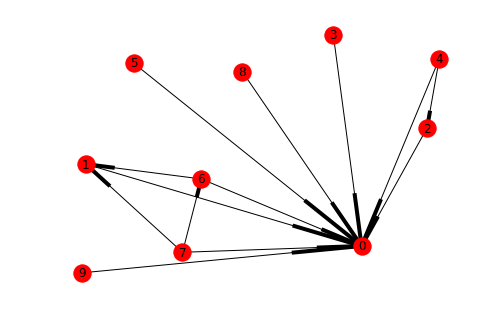

In [9]:
%matplotlib inline
import networkx as nx

# Create a typical power law directed network
H= nx.gnc_graph(10)

nx.draw(H, with_labels=True)

In [10]:
# compute pagerank
% time nx.pagerank(H).values()[:10]

TypeError: 'dict_values' object is not subscriptable

In [11]:
# some handy functions
n=4
H.out_degree(n), H.neighbors(n),H.edges(n)

(2, <dict_keyiterator at 0xcb1a450>, OutEdgeDataView([(4, 0), (4, 2)]))

In [12]:
for n in H.nodes():
    print(n, H.neighbors(n),H.out_degree(n))

0 <dict_keyiterator object at 0x0E4A96C0> 0
1 <dict_keyiterator object at 0x0E4A96C0> 1
2 <dict_keyiterator object at 0x0E4A96C0> 1
3 <dict_keyiterator object at 0x0E4A96C0> 1
4 <dict_keyiterator object at 0x0E4A96C0> 2
5 <dict_keyiterator object at 0x0E4A96C0> 1
6 <dict_keyiterator object at 0x0E4A96C0> 2
7 <dict_keyiterator object at 0x0E4A96C0> 3
8 <dict_keyiterator object at 0x0E4A96C0> 1
9 <dict_keyiterator object at 0x0E4A96C0> 1


In [13]:
## Return all nodes which point to n
def looks_at_me(H,n):
    return [k for (k,x) in H.edges() if x==n]

for n in H.nodes():
    if not looks_at_me(H,n)==[]:
        print(n, looks_at_me(H,n))

0 [1, 2, 3, 4, 5, 6, 7, 8, 9]
1 [6, 7]
2 [4]
6 [7]


**Q5** Use the iterative pagerank calculation in <http://en.wikipedia.org/wiki/PageRank#Iterative>
  to create a function `my_pagerank(H,iterations=20)` which calculates the pagerank of each node. The output is, just as with `nx.pagerank()` a dict with nodes as keys and pageranks as values.

There are several definitions of PageRank. The most useful is when we can view the distribution of PageRank over the nodes as a probability distribution. This means the values of all nodes have to sum to 1.

So after computing the PageRanks, normalize the values, so that they sum to one. The [wikipedia article on pagerank](http://en.wikipedia.org/wiki/PageRank) also makes this point.



In [14]:
def my_pagerank2(H,iterations=20,damping=.85):
    # Initialize every node with a pagerank of 1/|nodes| 
    pagerank = {i : 1 / len(H.nodes()) for i in H.nodes()}
    
    # loop over all iterations and nodes
    for i in range(iterations):
        for node in H.nodes():
            
            # calculate data to multiply with damping
            data = [pagerank[n] / len(looks_at_me(H,n)) for n in looks_at_me(H,node) if not looks_at_me(H,n) == []]
            
            # adjust pagerank value for each node
            pagerank[node] = (1 - damping) * (1 / len(H.nodes)) + damping * (sum(data))
    
    # return dict with nodes as keys and pageranks as values
    return pagerank

In [15]:
% time my_pagerank2(H).items()

Wall time: 4.66 ms


dict_items([(0, 0.052293750000000014), (1, 0.027750000000000004), (2, 0.015000000000000003), (3, 0.015000000000000003), (4, 0.015000000000000003), (5, 0.015000000000000003), (6, 0.015000000000000003), (7, 0.015000000000000003), (8, 0.015000000000000003), (9, 0.015000000000000003)])

**Q6**
Compare your result and that of networkx  by calculating the maximum squared error (= difference) over the nodes. You may even investigate the effect of the number of iterations on rather large networks.

 

In [16]:
# setting up variables
nx_pr = nx.pagerank(H)
my_pr = my_pagerank2(H)

# calculate mse by subtracting the values of my_pr from the values of nx_pr
{x: nx_pr[x] - my_pr[x] for x in my_pr}

{0: 0.39184980933456715,
 1: 0.06872078457974035,
 2: 0.060172066334125154,
 3: 0.037752454557181694,
 4: 0.037752454557181694,
 5: 0.037752454557181694,
 6: 0.052698862408477334,
 7: 0.037752454557181694,
 8: 0.037752454557181694,
 9: 0.037752454557181694}

In [18]:
nx_pr

{0: 0.4441435593345672,
 1: 0.09647078457974034,
 2: 0.07517206633412515,
 3: 0.052752454557181694,
 4: 0.052752454557181694,
 5: 0.052752454557181694,
 6: 0.06769886240847733,
 7: 0.052752454557181694,
 8: 0.052752454557181694,
 9: 0.052752454557181694}

**Q7** Compute the person correlation between your result and that of networkx.
* HINT: in the notebook <http://nbviewer.ipython.org/url/maartenmarx.nl/teaching/CollectieveIntelligentie/NoteBooks/InformationRetrieval.ipynb> we created a pandas series from a list, but you can just as easily in the same way create a series from a dict. Then use pandas correlation.

In [25]:
import scipy

scipy.stats.pearsonr(list(my_pr.values()), list(nx_pr.values()))[0]

0.90955612348639825

**Q8** Compare your, hopefully very declarative and short (it can be done in 5 lines of readable code) definition of pagerank with that in the Collective Intelligence book, on page 71. 

* Do you obtain different values?
* Compare readability.
* Why would you want to store this information in a database while doing the computation? 